## Two electrons in a well

Now that's been quite a slog to get through all that theory, it'll nice to have the concepts we've introduced be illuminated by actually running iDEA. Hopefully at this point you've read the "Getting started" notebook, so we can skip through the details of actually running the code and instead focus on the physical results. 

In [2]:
from iDEA.input import Input
pm = Input.from_python_file("parameters.py")

We're just going to run the ground state exact, non-interacting and LDA parts of the code since this is what we've spent time looking at so far in this notebook. 

In [3]:
pm.run.name = "gaussian_potential_run1"
pm.run.LDA = True
#pm.run.verbosity = "low"

#Checking that we've got everything turned on that we want
print(pm.run)
print(pm.sys)

name = 'gaussian_potential_run1'
time_dependence = False
verbosity = 'default'
save = True
module = 'iDEA'
NON = True
LDA = True
MLP = False
HF = False
EXT = True
MBPT = False
HYB = False
LAN = False

NE = 2
grid = 201
stencil = 3
xmax = 10.0
tmax = 1.0
imax = 1001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function v_ext at 0x10a404378>
v_pert = <function v_pert at 0x10a404400>
v_pert_im = <function v_pert_im at 0x10a404488>



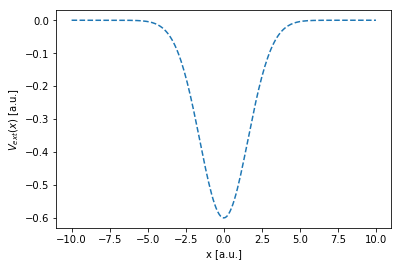

In [9]:
# define our new potential
import numpy as np
def gaussian_pot(x):
    return -0.6 * np.exp(-0.2 * (x**2))

# and pass it to iDEA
pm.sys.v_ext = gaussian_pot

# Let's see what it looks like
pm.setup_space()
x = pm.space.grid

import matplotlib.pyplot as plt
plt.plot(x,gaussian_pot(x),'--',label="External Potential")
plt.xlabel("x [a.u.]")
plt.ylabel(r"$V_{ext}(x)$ [a.u.]")
plt.show()

In [5]:
# Now let's run iDEA with the parameters we've entered
results = pm.execute()

                                                              
                *    ****     *****       *                   
                     *   *    *          * *                  
                *    *    *   *         *   *                 
                *    *     *  *****    *     *                
                *    *    *   *       *********               
                *    *   *    *      *         *              
                *    ****     ***** *           *             
                                                              
  +----------------------------------------------------------+
  |          Interacting Dynamic Electrons Approach          |
  |              to Many-Body Quantum Mechanics              |
  |                                                          |
  |                      Release 2.1.0                       |
  |                                                          |
  |       Created by Piers Lillystone, James Ramsden,  

EXT: t = 54.32000, convergence = 0.00023793450684949383KK

EXT: t = 108.58000, convergence = 1.8687748266939884e-05[K

EXT: t = 122.04000, convergence = 9.993597939093998e-065[K
EXT: ground-state converged
EXT: ground-state energy = -0.22723
all jobs done 



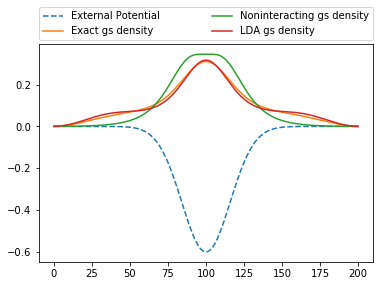

In [8]:
#We then plot the different densities to compare the different approaches
import matplotlib.pyplot as plt

plt.plot(results.ext.gs_ext_vxt,'--', label = "External Potential")
plt.plot(results.ext.gs_ext_den, label = "Exact gs density")
plt.plot(results.non.gs_non_den, label = "Noninteracting gs density")
plt.plot(results.lda.gs_lda2_den, label = "LDA gs density")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

This plot illustrates a few things interesting things about the theory. 

Firstly we can see that the non-interacting electron approximation gets the rough shape of the potential right. However, the electron's are more likely to be found near the centre of the well since they prefer to be in regions of low potential, and don't have Coulomb interaction pushing them away from each other. 

We also see that the LDA does a very good job, almost perfectly recovering the exact case. 